# Customer Segmentation: Clustering

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

Veri setimizi internet üzerinden bulduk. Müşteri Veri setimiz 2240 satır ve 29 kolondan oluşuyor.

In [4]:
#Loading the dataset
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Veri setimiz üzerinde veri temizliği yaptık.

In [6]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


veri setimiz içinde bulunan ilk kayır ve son kayıt durumuna baktık.

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


customer_for adında yeni bir özellik oluşturduk.

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Veri setimiz içinde statü durumlarına baktık.

In [9]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


veri setimizi daha iyi kümeleyebilmek için veri setimize eldeki verilerden yeni kolonlar ekledik.

In [10]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-10-7ccaa6536fcb>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


Bu kısımda verilerin dağılımına tekrar bakıp analizin doğru olması için alakasız verilerin durumuna baktık.


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

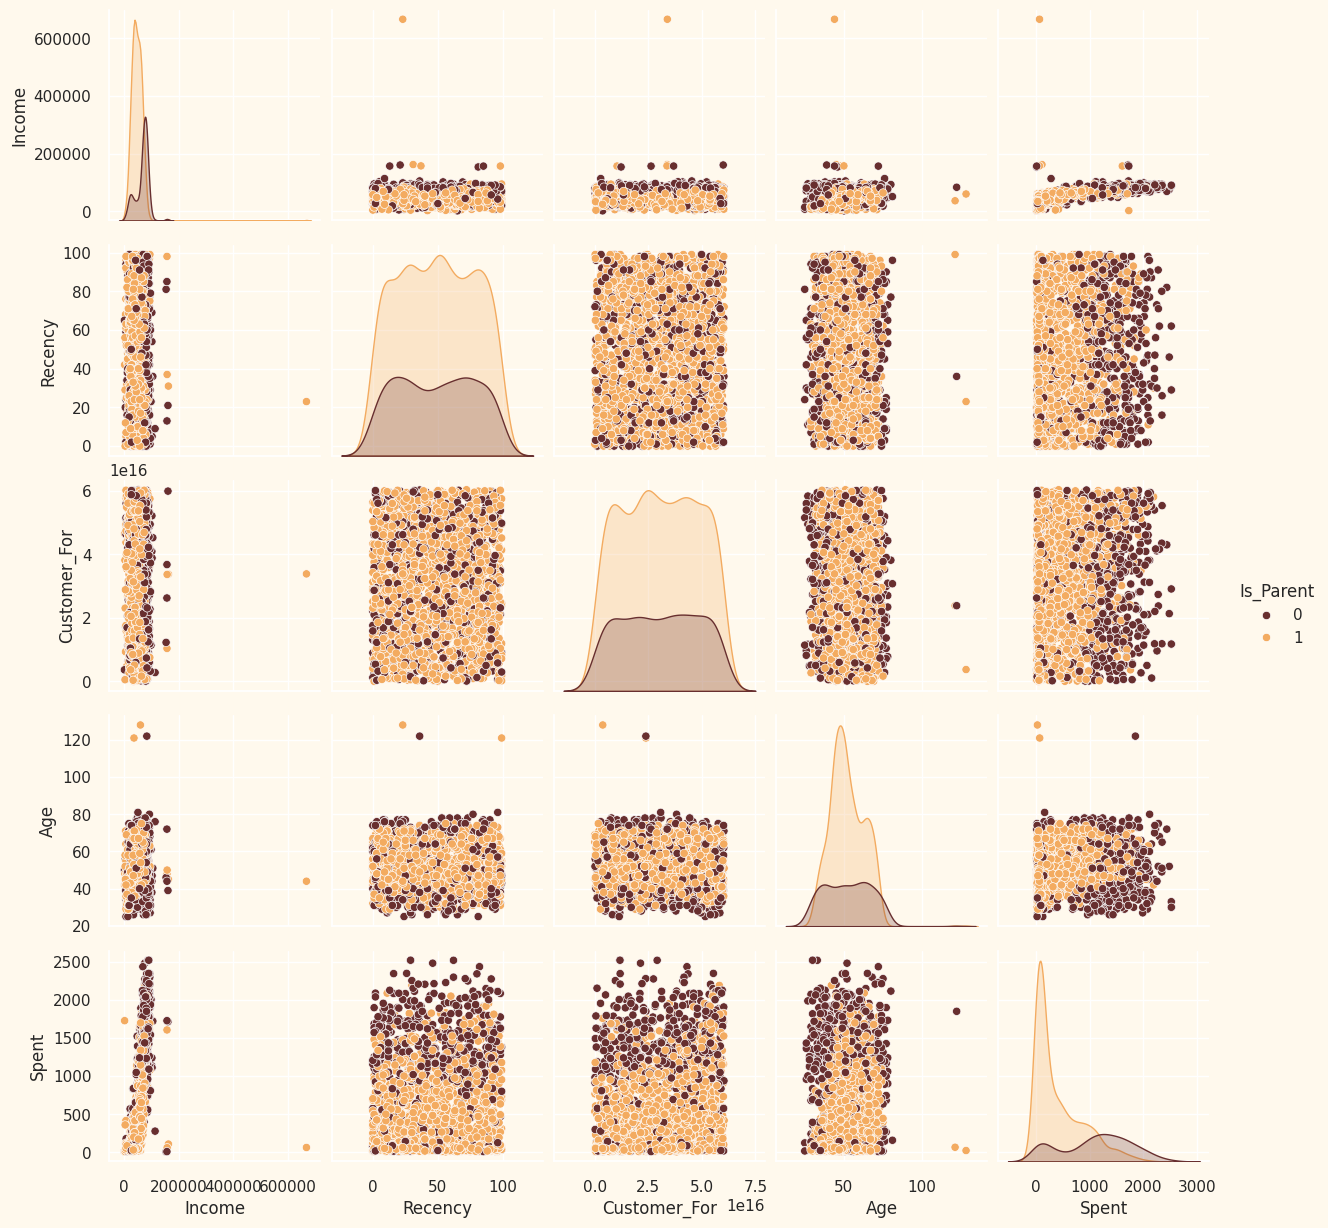

In [12]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

alakasız verileri veri setimizden çıkardık.


In [13]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


correlation matrix çıkardık.

<Axes: >

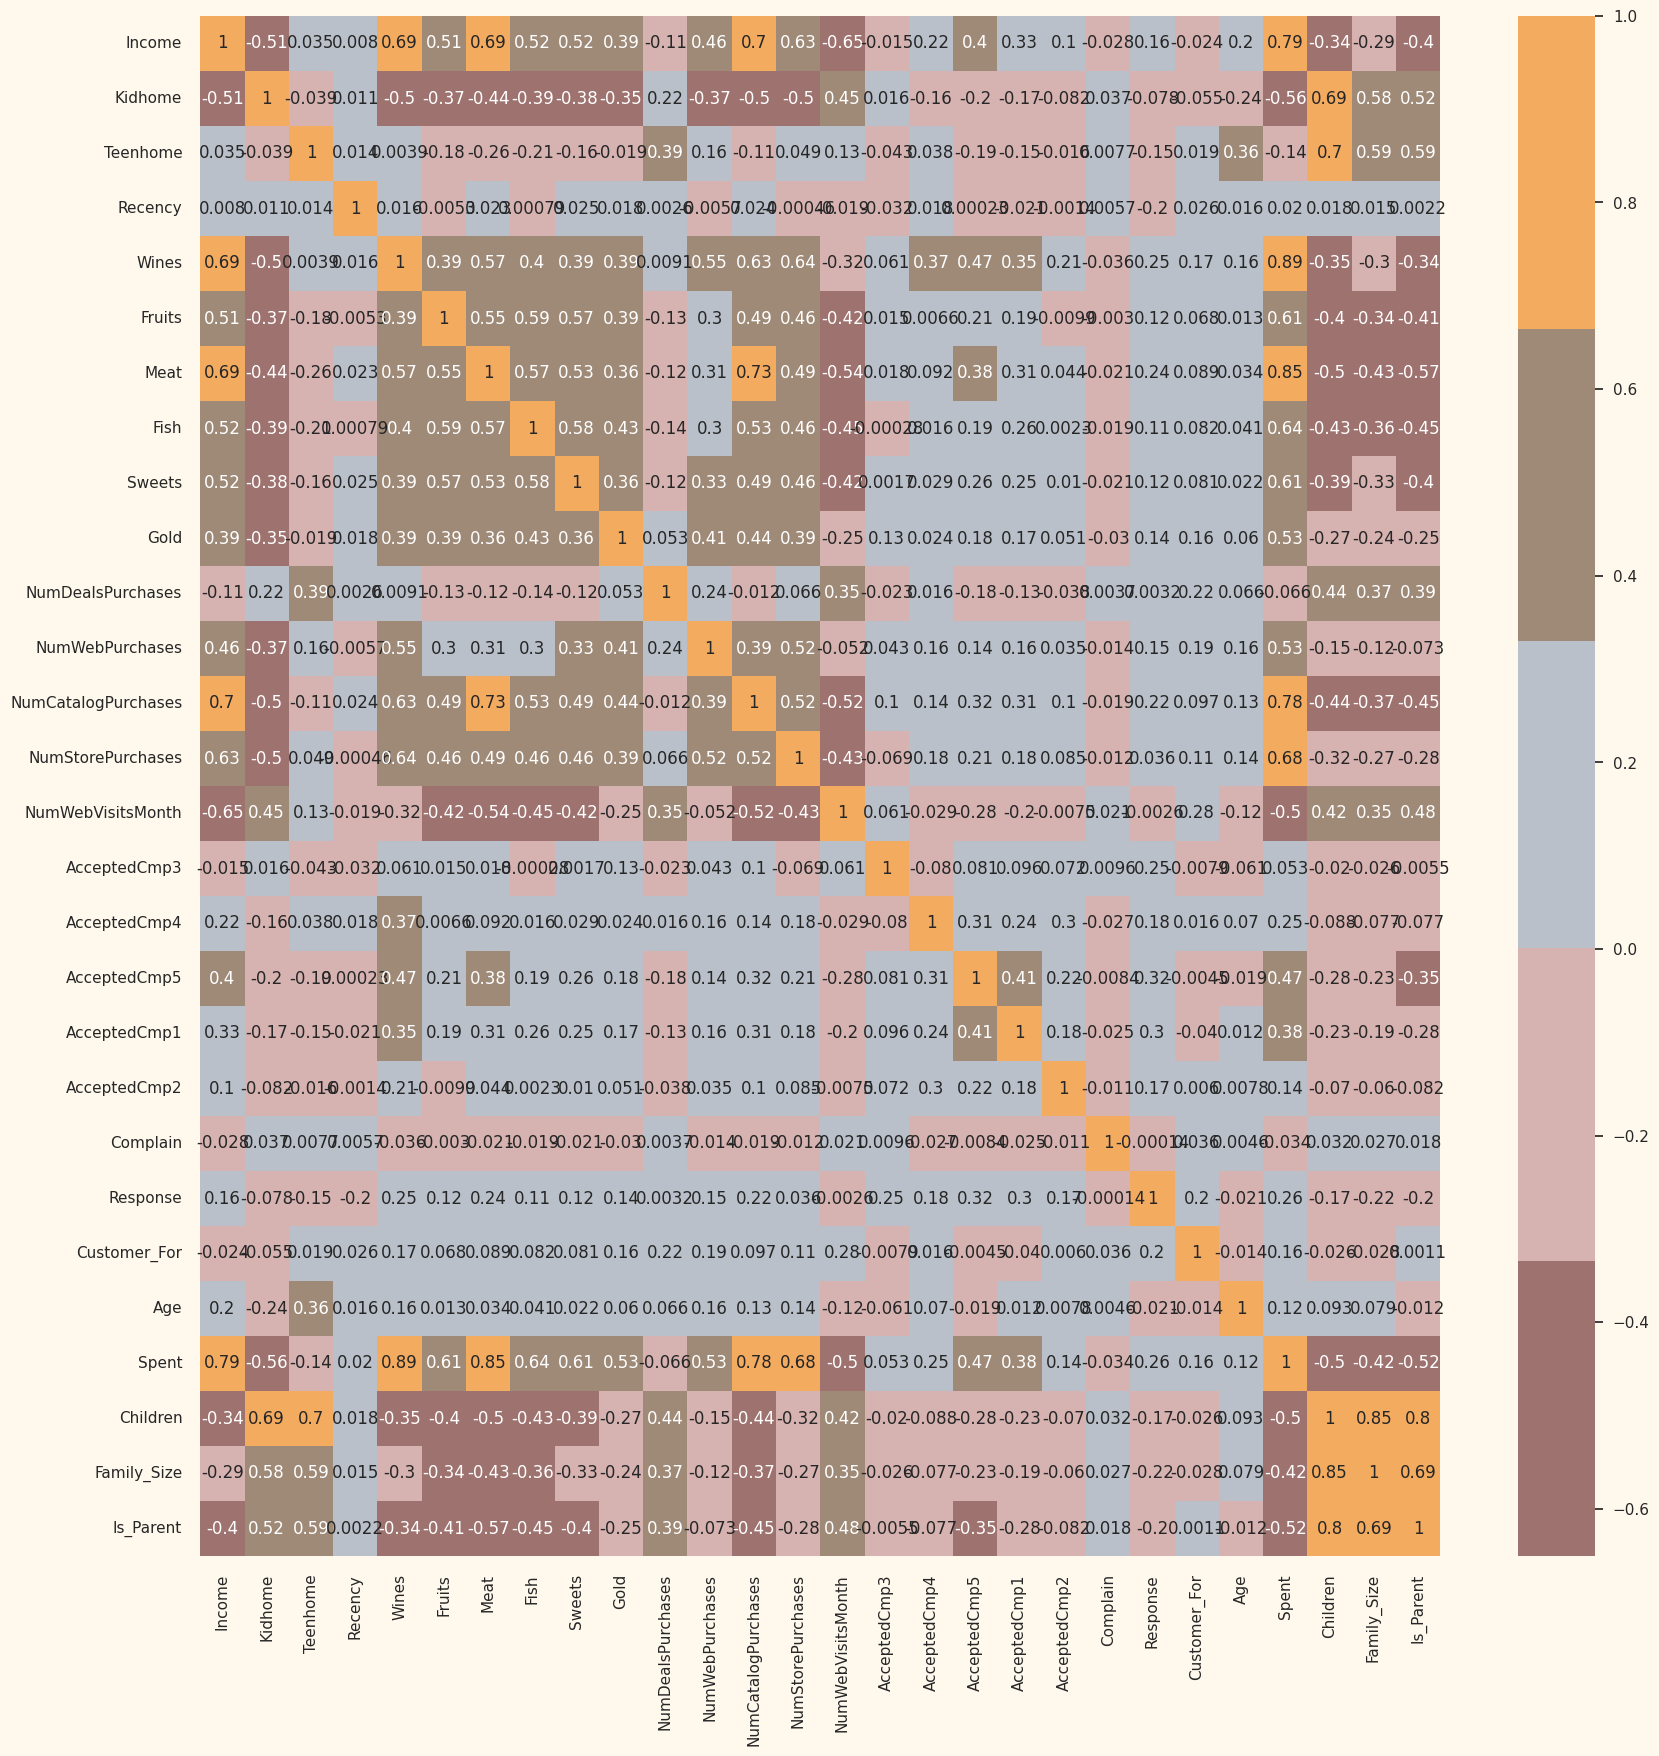

In [14]:
#correlation matrix
corrmat= data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

text olan veri kolonlarını bulduk

In [15]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


text olan verileri numerik hale getirerek tüm veri kolonlarımızı numerek hale getirdik.

In [16]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


veri setimiz tüm kolonlar numerk hale geldikten sonra datayı scale ettik.

In [34]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
#ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [35]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.09552,2.375425,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,0.755548
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.09552,-0.420977,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-0.570859
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.09552,-0.420977,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,0.755548
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.09552,-0.420977,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,0.092345
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.09552,-0.420977,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,-1.234062


In [36]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.09552,2.375425,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,0.755548
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.09552,-0.420977,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-0.570859
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.09552,-0.420977,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,0.755548
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.09552,-0.420977,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,0.092345
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.09552,-0.420977,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,-1.234062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,-0.09552,-0.420977,0.134778,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456,2.081955
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.09552,-0.420977,-1.653326,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456,-1.234062
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,-0.09552,-0.420977,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139,0.755548
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,-0.09552,-0.420977,-0.976612,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456,2.081955


scale ettiğimiz veri seti için 2 den 8 kadar kümeleme durumlarını k-means algoritmsına göre hesapladık ve sonuçlarını çıkardık.

In [37]:
num_clusters = 2 # Oluşturmak istediğimiz cluster sayısı
km = KMeans(n_clusters=num_clusters, random_state=10)
km.fit(scaled_ds)

num_clusters = 3 # Oluşturmak istediğimiz cluster sayısı
km3 = KMeans(n_clusters=num_clusters, random_state=10)
km3.fit(scaled_ds)

num_clusters = 4 # Oluşturmak istediğimiz cluster sayısı
km4 = KMeans(n_clusters=num_clusters, random_state=10)
km4.fit(scaled_ds)

num_clusters = 5 # Oluşturmak istediğimiz cluster sayısı
km5 = KMeans(n_clusters=num_clusters, random_state=10)
km5.fit(scaled_ds)

num_clusters = 6 # Oluşturmak istediğimiz cluster sayısı
km6 = KMeans(n_clusters=num_clusters, random_state=10)
km6.fit(scaled_ds)

num_clusters = 7 # Oluşturmak istediğimiz cluster sayısı
km7 = KMeans(n_clusters=num_clusters, random_state=10)
km7.fit(scaled_ds)

num_clusters = 8 # Oluşturmak istediğimiz cluster sayısı
km8 = KMeans(n_clusters=num_clusters, random_state=10)
km8.fit(scaled_ds)

KMeans(random_state=10)

kmeans algoritmasına göre kümeleme sonuçlarını optimum kaç küme olması gerektiğini bulmak için inertia değerlerini bulduk.

In [38]:
print(' 2 Cluster Inertia:', km.inertia_)
print(' 3 Cluster Inertia:', km3.inertia_)
print(' 4 Cluster Inertia:', km4.inertia_)
print(' 5 Cluster Inertia:', km5.inertia_)
print(' 6 Cluster Inertia:', km6.inertia_)
print(' 7 Cluster Inertia:', km7.inertia_)
print(' 8 Cluster Inertia:', km8.inertia_)

 2 Cluster Inertia: 53120.1774406237
 3 Cluster Inertia: 48131.64722054296
 4 Cluster Inertia: 45360.861479571904
 5 Cluster Inertia: 42935.82607386161
 6 Cluster Inertia: 41272.03259305361
 7 Cluster Inertia: 39755.473957491566
 8 Cluster Inertia: 38646.434393534626


inertia değerlerine göre garafigimzi çizdik dirsek değerine göre optimum küme sayısına ulaşmak için

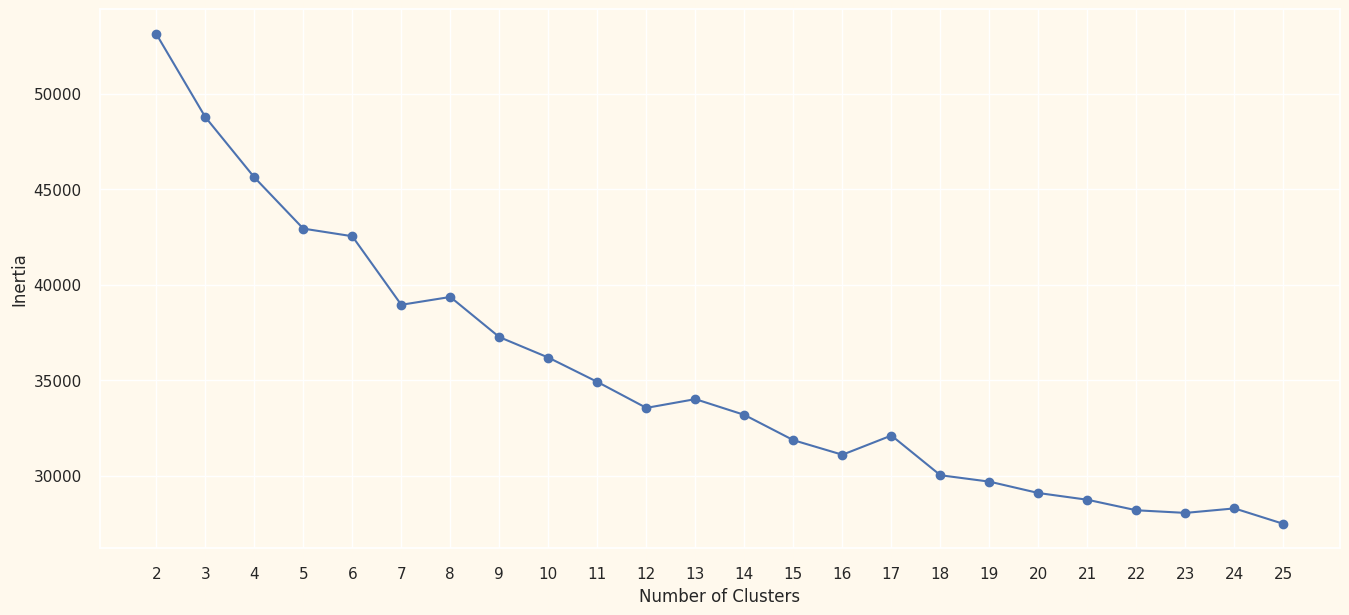

In [39]:
inertia = []
list_num_clusters = list(range(2,26))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)

plt.figure(figsize=[16,7])
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia)
plt.xticks(range(2,26))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

sadece inertia değeri değil daha net bir küme sayısı bulmak içib silhouette değerlerini çıkardık.

In [40]:
print('2 Cluster Silhouette Score:', silhouette_score(scaled_ds, km.labels_))
print('3 Cluster Silhouette Score:', silhouette_score(scaled_ds, km3.labels_))
print('4 Cluster Silhouette Score:', silhouette_score(scaled_ds, km4.labels_))
print('5 Cluster Silhouette Score:', silhouette_score(scaled_ds, km5.labels_))
print('6 Cluster Silhouette Score:', silhouette_score(scaled_ds, km6.labels_))
print('7 Cluster Silhouette Score:', silhouette_score(scaled_ds, km7.labels_))
print('8 Cluster Silhouette Score:', silhouette_score(scaled_ds, km8.labels_))


2 Cluster Silhouette Score: 0.12127152411256466
3 Cluster Silhouette Score: 0.16091166942682575
4 Cluster Silhouette Score: 0.1625146928814845
5 Cluster Silhouette Score: 0.12232283530231552
6 Cluster Silhouette Score: 0.12465727247710848
7 Cluster Silhouette Score: 0.12435333600854498
8 Cluster Silhouette Score: 0.12627368710894069


Silhouette değerlerine göre tekrar dirsek grafiğini çizdirdik ve optimum olarak 4 küme olduğunu gördük.

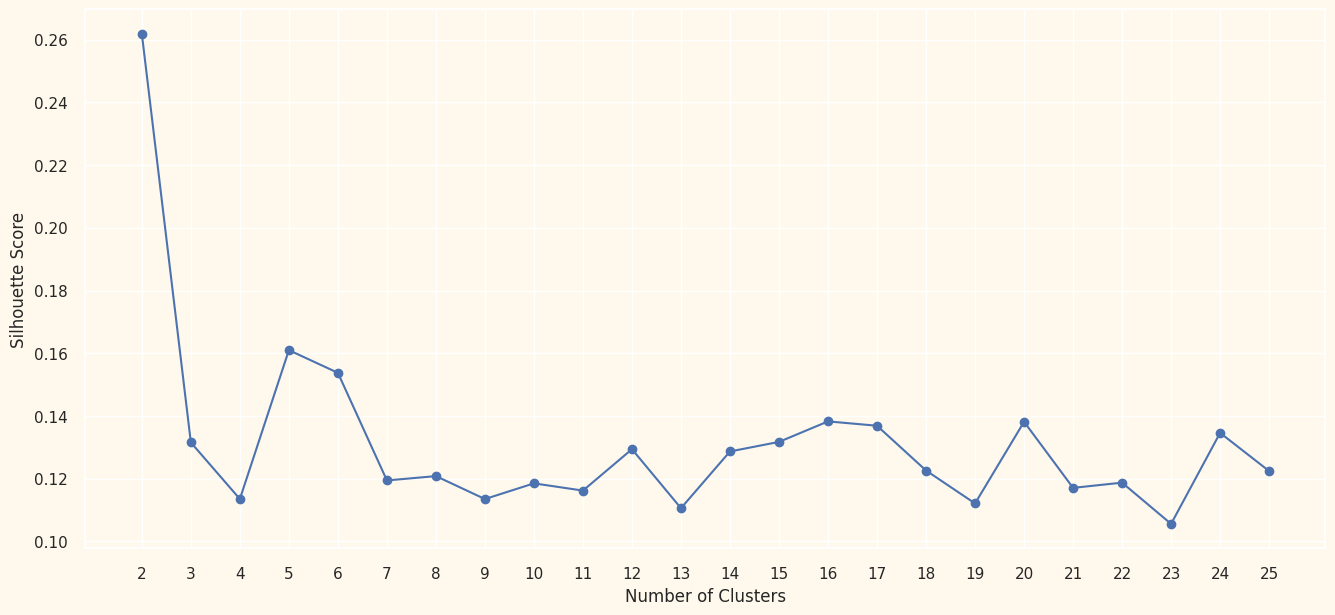

In [41]:
silhouette = []
list_num_clusters = list(range(2,26))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(scaled_ds)
    silhouette.append(silhouette_score(scaled_ds, km.labels_))

plt.figure(figsize=[16,7])
plt.plot(list_num_clusters, silhouette)
plt.scatter(list_num_clusters, silhouette)
plt.xticks(range(2,26))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [44]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)
scaled_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

Bu denetimsiz bir kümeleme olduğu için. Modelimizi değerlendirmek veya puanlamak için etiketlenmiş bir özelliğe sahip değiliz. Bu bölümün amacı, oluşan kümelerdeki örüntüleri incelemek ve kümelerin örüntülerinin doğasını belirlemektir.

Bunun için keşifsel veri analizi ile verilere kümeler ışığında bakacağız ve sonuçlar çıkaracağız.

İlk olarak, kümelerin grup dağılımına bir göz atalım

<ipython-input-45-85586dc5d9c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=scaled_ds["Clusters"], palette= pal)


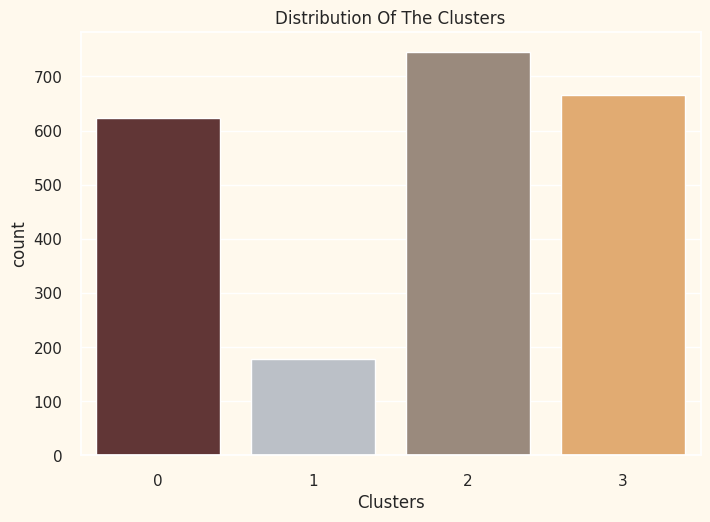

In [45]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=scaled_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Gelir ve harcama grafiği kümelenme modelini göstermektedir

grup 0: yüksek harcama ve ortalama geli̇r
grup 1: yüksek harcama ve yüksek geli̇r
grup 2: düşük harcama ve düşük geli̇r
grup 3: yüksek harcama ve düşük geli̇r

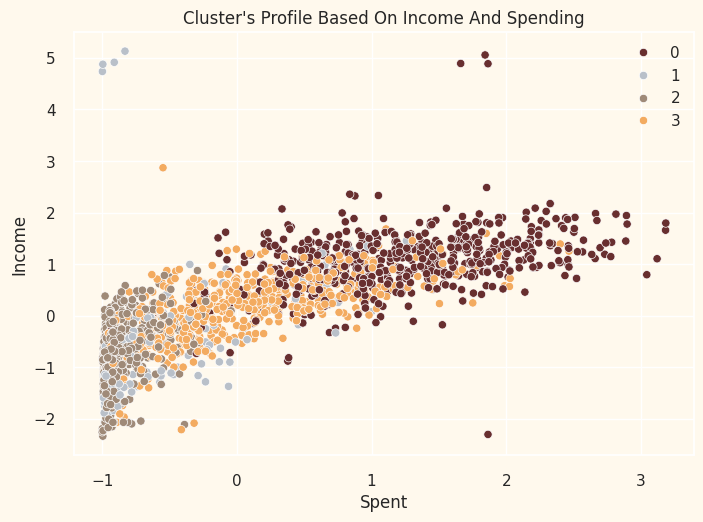

In [46]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["Income"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

kümelerin harcamaya göre durumları analiz edildi.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-47-bbc3f6dfd598>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

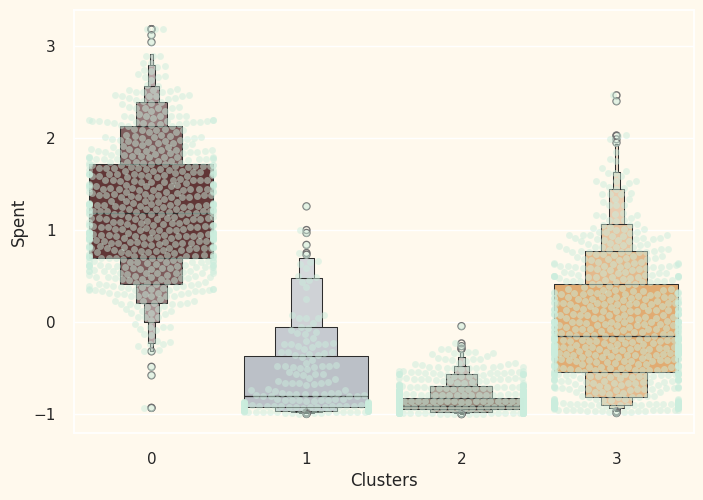

In [47]:
plt.figure()
pl=sns.swarmplot(x=scaled_ds["Clusters"], y=scaled_ds["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=scaled_ds["Clusters"], y=scaled_ds["Spent"], palette=pal)
plt.show()

bütün kampanyaları toplayıp kümelere göre kampanya kullanımlarını analiz ettik. çok etkin bir şekilde kampanya kullanımının olmadığını gördük.

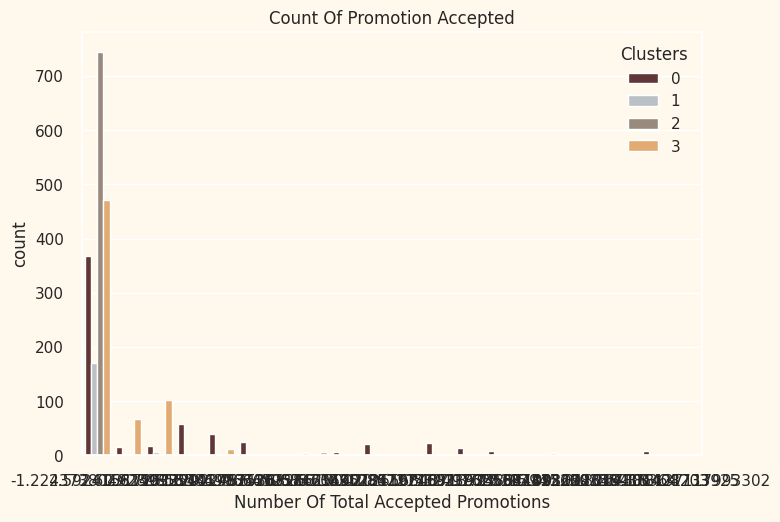

In [48]:
#Creating a feature to get a sum of accepted promotions
scaled_ds["Total_Promos"] = scaled_ds["AcceptedCmp1"]+ scaled_ds["AcceptedCmp2"]+ scaled_ds["AcceptedCmp3"]+ scaled_ds["AcceptedCmp4"]+ scaled_ds["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=scaled_ds["Total_Promos"],hue=scaled_ds["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Kampanyaların aksine, sunulan fırsatlar iyi sonuç verdi. Küme 0 ve küme 3 ile en iyi sonucu verdi. Ancak, yıldız müşterilerimiz 1. küme fırsatlarla pek ilgilenmiyor. Hiçbir şey küme 2'yi ezici bir çoğunlukla cezbetmiyor gibi görünüyor

<ipython-input-49-a4519d0312cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=scaled_ds["NumDealsPurchases"],x=scaled_ds["Clusters"], palette= pal)


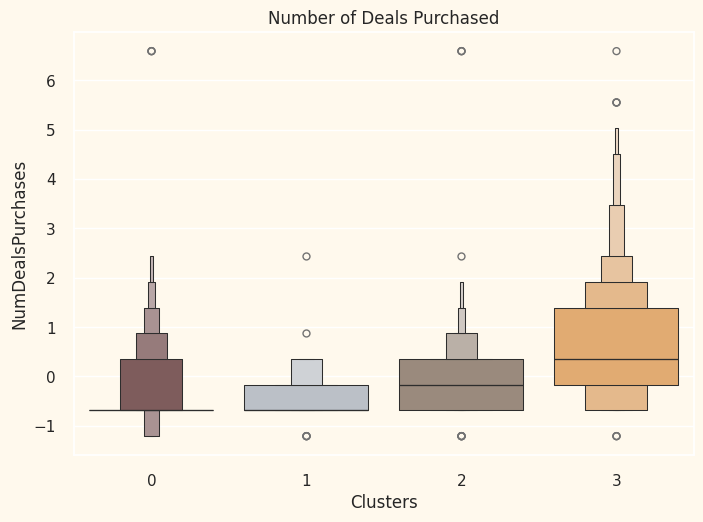

In [49]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=scaled_ds["NumDealsPurchases"],x=scaled_ds["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Şimdi kümeleri oluşturduk ve satın alma alışkanlıklarına baktık. Bakalım bu kümelerde kimler var? Bunun için, oluşturulan kümelerin profilini çıkaracağız ve kimin yıldız müşterimiz olduğu ve perakende mağazasının pazarlama ekibinin kiminle daha fazla ilgilenmesi gerektiği konusunda bir sonuca varacağız.

Buna karar vermek için müşterinin kişisel özelliklerinin göstergesi olan bazı özellikleri, içinde bulundukları küme ışığında çizeceğim. Elde ettiğim sonuçlara dayanarak bir sonuca varacağım.

<Figure size 800x550 with 0 Axes>

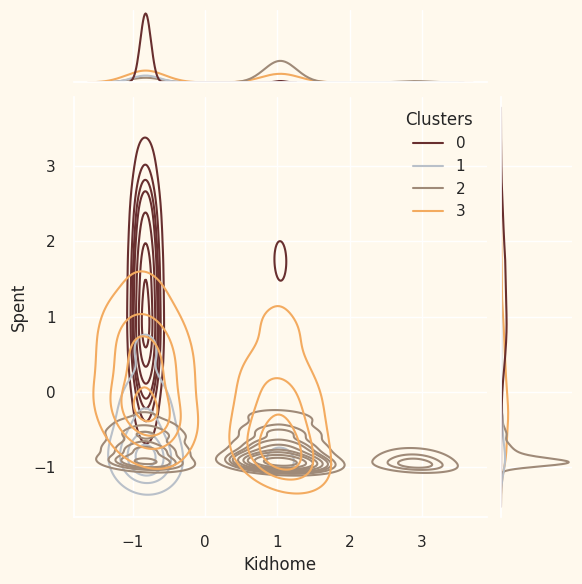

<Figure size 800x550 with 0 Axes>

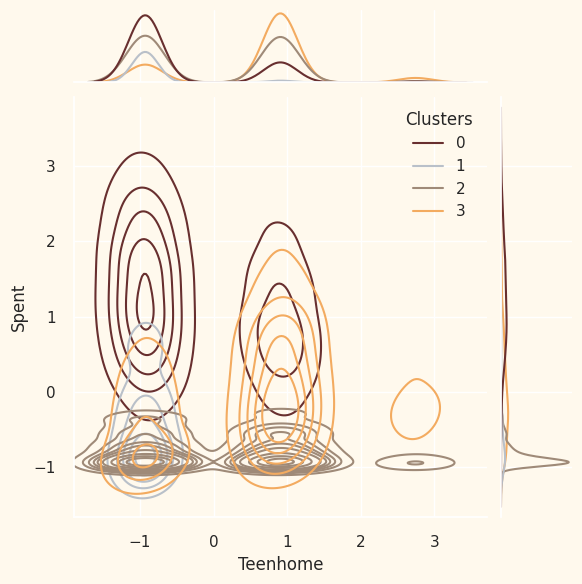

<Figure size 800x550 with 0 Axes>

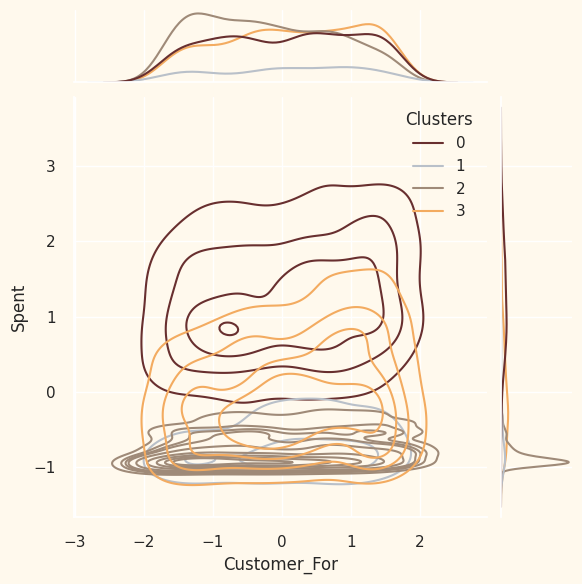

<Figure size 800x550 with 0 Axes>

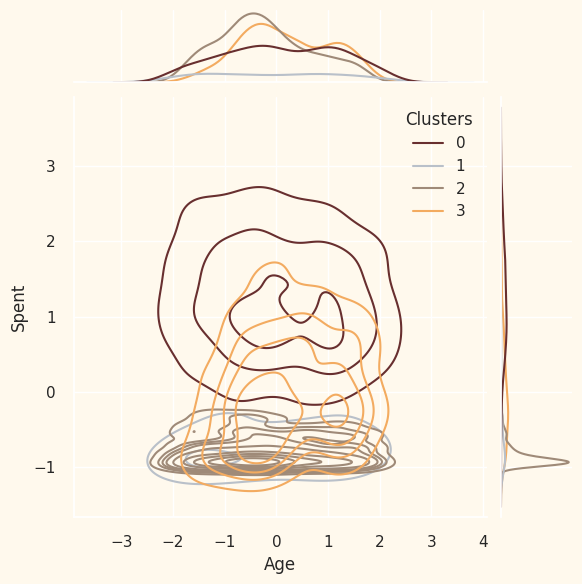

<Figure size 800x550 with 0 Axes>

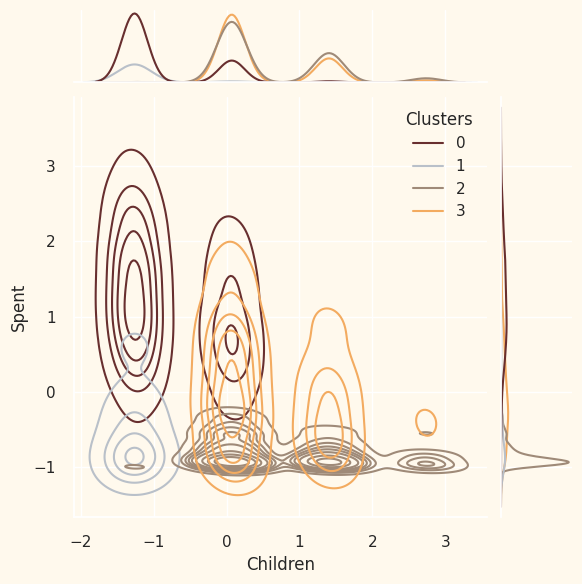

<Figure size 800x550 with 0 Axes>

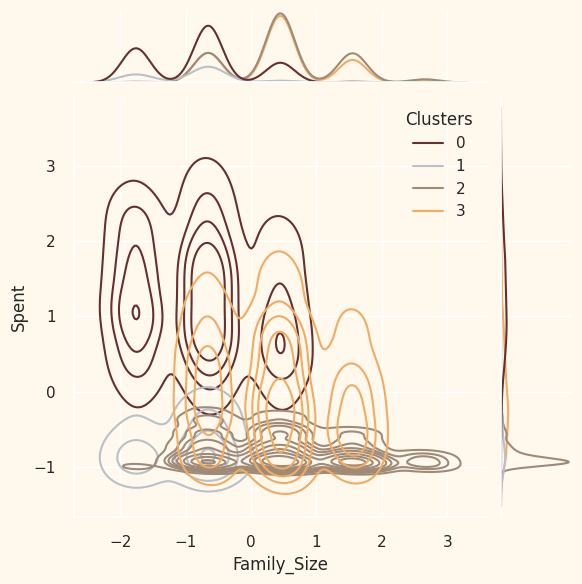

<Figure size 800x550 with 0 Axes>

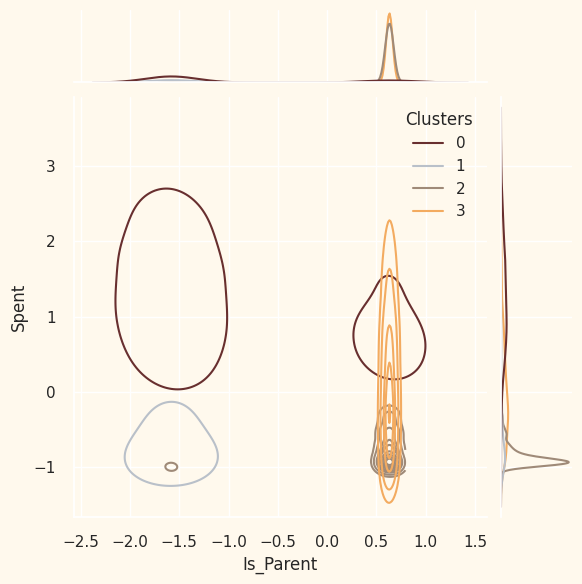

<Figure size 800x550 with 0 Axes>

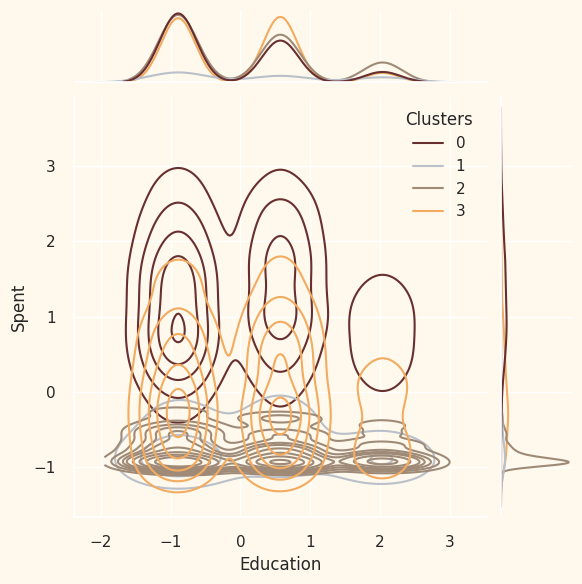

<Figure size 800x550 with 0 Axes>

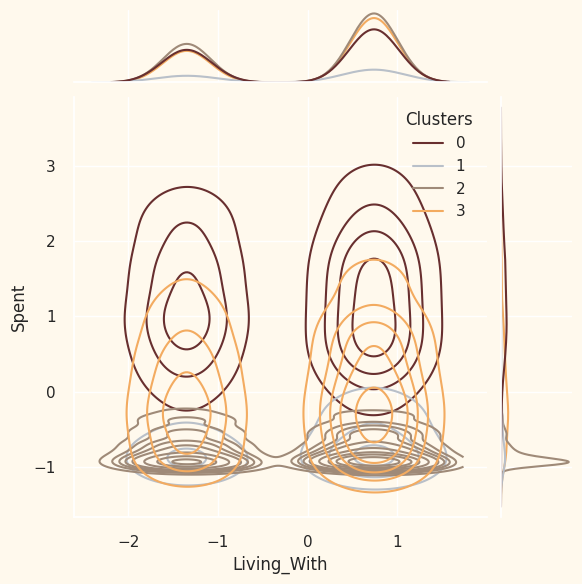

In [50]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=scaled_ds[i], y=scaled_ds["Spent"], hue =scaled_ds["Clusters"], kind="kde", palette=pal)
    plt.show()